准确率: 1.00


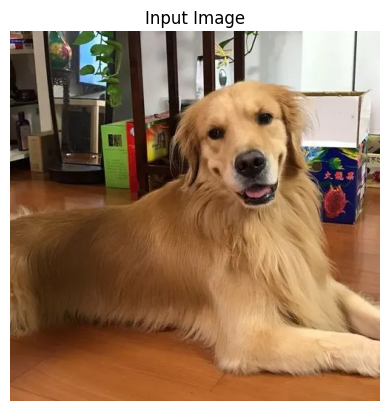

对单张图片的预测结果: dog


In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image
import os
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# 从指定路径加载图片并将其转换为一维向量的函数
def load_image_from_path(img_path):
    """
    此函数用于打开指定路径的图片，将其转换为灰度图，调整大小为 64x64，然后将图片展平为一维向量

    参数:
    img_path (str): 图片的文件路径

    返回:
    np.array: 展平后的图片一维向量
    """
    img = Image.open(img_path)
    img = img.convert('L')  # 转换为灰度图
    img = img.resize((64, 64))  # 调整大小
    return np.array(img).flatten()  # 展平为一维向量

# 从指定路径加载图片并进行数据增强
def load_image_and_augment(img_path):
    img = Image.open(img_path)
    img = img.convert('L')  
    img = img.resize((64, 64))  
    augmented_images = [img]

    # 水平翻转
    augmented_images.append(ImageOps.mirror(img))

    # 垂直翻转
    augmented_images.append(ImageOps.flip(img))

    # 旋转 90 度
    augmented_images.append(img.rotate(90))

    # 旋转 180 度
    augmented_images.append(img.rotate(180))

    # 旋转 270 度
    augmented_images.append(img.rotate(270))

    return [np.array(image).flatten() for image in augmented_images]

# 从指定文件夹加载图片及其对应的标签
def load_images(folder, prefix_to_label):
    """
    此函数用于从指定文件夹加载图片，并根据文件名前缀确定图片的标签

    参数:
    folder (str): 图片所在的文件夹路径
    prefix_to_label (dict): 文件名前缀与对应标签的映射字典

    返回:
    np.array, np.array: 分别为图片数据的数组和对应的标签数组
    """
    images = []
    labels = []
    for filename in os.listdir(folder):
        # 遍历所有可能的标签前缀
        for prefix, label in prefix_to_label.items():
            # 检查文件名是否包含当前前缀
            if prefix in filename:
                img_path = os.path.join(folder, filename)
                augmented_images = load_image_and_augment(img_path)
                images.extend(augmented_images)
                labels.extend([label] * len(augmented_images))
                break
    return np.array(images), np.array(labels)

# 测试单张图片的函数
def test_single_image_and_show(model, img_path, label_to_prefix):
    """
    此函数用于使用训练好的模型对单张图片进行分类预测，并显示该图片

    参数:
    model (KNeighborsClassifier): 训练好的 KNN 分类器
    img_path (str): 待预测图片的文件路径
    label_to_prefix (dict): 标签与文件名前缀的映射字典

    返回:
    str: 预测的类别（猫或狗）
    """
    img = Image.open(img_path)
    plt.imshow(img)  
    plt.axis('off')  
    plt.title('Input Image')
    plt.show()

    img_flattened = load_image_from_path(img_path)
    img_flattened = img_flattened.reshape(1, -1)
    prediction = model.predict(img_flattened)
    predicted_label = prediction[0]
    predicted_class = label_to_prefix[predicted_label]
    return predicted_class

# 定义文件名前缀与标签的对应关系
prefix_to_label = {'cat.': 0, 'dog.': 1}

# 加载所有数据
all_images, all_labels = load_images('D:\\30877\\Documents\\archive\\PetImages', prefix_to_label)

# 划分训练集和测试集
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# 在测试集上进行预测
predictions = best_knn.predict(test_images)

# 计算准确率
accuracy = accuracy_score(test_labels, predictions)

# 输出准确率
print(f"准确率: {accuracy:.2f}")

# 超参数搜索
param_grid = {'n_neighbors': list(range(1, 11))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(train_images, train_labels)

best_knn = grid_search.best_estimator_

# 标签与文件名前缀的映射字典（用于将预测的标签转换为类别名称）
label_to_prefix = {0: 'cat', 1: 'dog'}
test_img_path = 'D:\\30877\\Documents\\archive\\PetImages\\dog.00004.jpg'
predicted_class = test_single_image_and_show(best_knn, test_img_path, label_to_prefix)
print(f'对单张图片的预测结果: {predicted_class}')